#Import Libraries#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve
import time

import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('smoke.csv')


In [2]:
data.head()

Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.drop(['UTC', 'CNT'],axis=1,inplace=True)

In [5]:
data.head()

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0          20.000        57.36          0        400   12306        18520   
1          20.015        56.67          0        400   12345        18651   
2          20.029        55.96          0        400   12374        18764   
3          20.044        55.28          0        400   12390        18849   
4          20.059        54.69          0        400   12403        18921   

   Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
0        939.735    0.0    0.0    0.0    0.0    0.0           0  
1        939.744    0.0    0.0    0.0    0.0    0.0           0  
2        939.738    0.0    0.0    0.0    0.0    0.0           0  
3        939.736    0.0    0.0    0.0    0.0    0.0           0  
4        939.744    0.0    0.0    0.0    0.0    0.0           0

In [6]:
data.shape

(62630, 13)

In [7]:
data.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [8]:
data.dtypes

Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
Fire Alarm          int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [10]:
data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [11]:
X = data.drop('Fire Alarm', axis=1)
y=data['Fire Alarm']

In [12]:
X.head()

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0          20.000        57.36          0        400   12306        18520   
1          20.015        56.67          0        400   12345        18651   
2          20.029        55.96          0        400   12374        18764   
3          20.044        55.28          0        400   12390        18849   
4          20.059        54.69          0        400   12403        18921   

   Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  
0        939.735    0.0    0.0    0.0    0.0    0.0  
1        939.744    0.0    0.0    0.0    0.0    0.0  
2        939.738    0.0    0.0    0.0    0.0    0.0  
3        939.736    0.0    0.0    0.0    0.0    0.0  
4        939.744    0.0    0.0    0.0    0.0    0.0

In [13]:

print(len(X))

62630


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))

50104


<Axes: xlabel='Fire Alarm', ylabel='Count'>

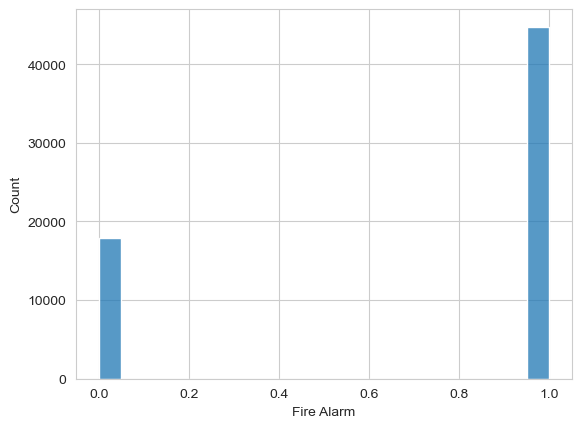

In [15]:

sns.set_style("whitegrid")
sns.histplot(data["Fire Alarm"])

c:\Users\esmae\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


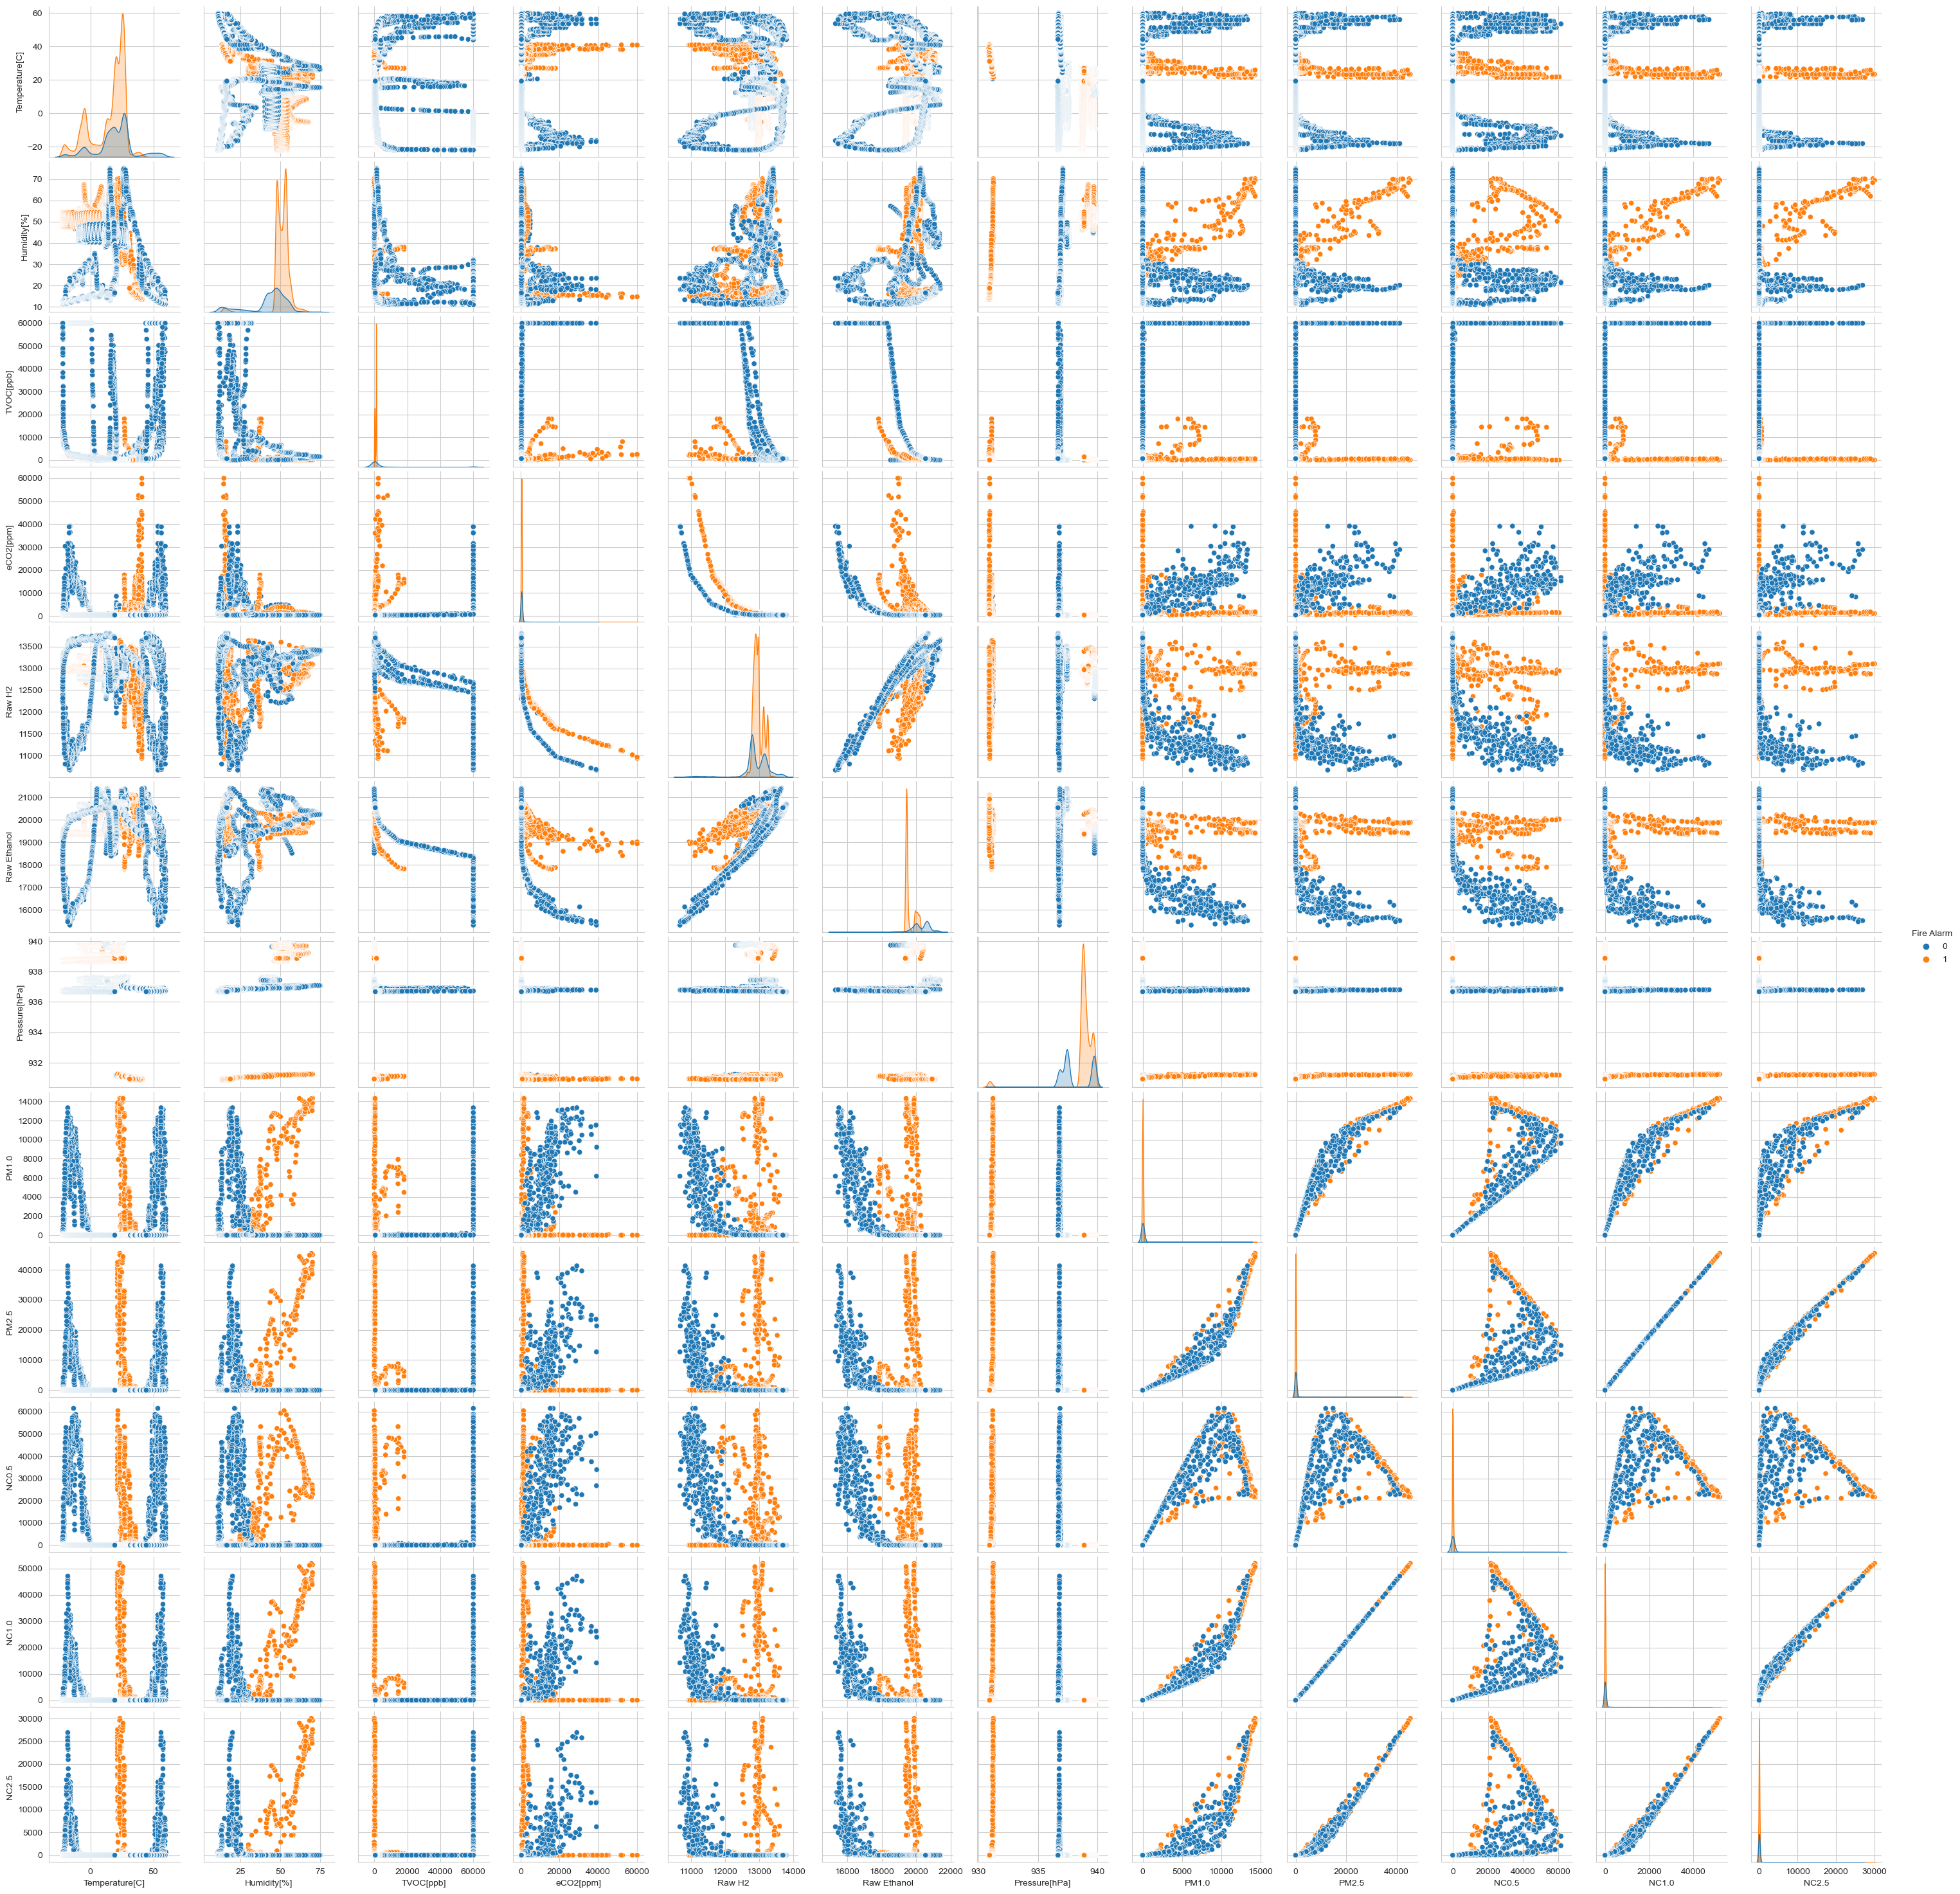

In [18]:
sns.pairplot(data,hue="Fire Alarm")

In [39]:
datas = pd.read_csv('smoke.csv')
corr = datas.corr()
corr

Unnamed: 0       UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
Unnamed: 0        1.000000  0.551987        0.425636    -0.498121   0.248813   
UTC               0.551987  1.000000       -0.164174    -0.391907   0.180731   
Temperature[C]    0.425636 -0.164174        1.000000    -0.243986   0.082442   
Humidity[%]      -0.498121 -0.391907       -0.243986     1.000000  -0.488878   
TVOC[ppb]         0.248813  0.180731        0.082442    -0.488878   1.000000   
eCO2[ppm]         0.160665  0.132100        0.079265    -0.369095   0.606118   
Raw H2           -0.232854 -0.151088       -0.135540     0.247199  -0.653053   
Raw Ethanol       0.083094  0.166555       -0.037343     0.068782  -0.673715   
Pressure[hPa]    -0.580829 -0.434375       -0.251203     0.694614  -0.220004   
PM1.0             0.151785  0.123168        0.037330    -0.236538   0.597366   
PM2.5             0.128487  0.105304        0.032084    -0.178882   0.477424   
NC0.5             0.162053  0.130288        0.039291    -0.277389   0.670657   
NC1.0             0.126418  0.103695        0.031608    -0.174224   0.467386   
NC2.5             0.100300  0.083234        0.025526    -0.118502   0.344721   
CNT              -0.053262 -0.251595       -0.089850     0.251965  -0.057703   
Fire Alarm       -0.361351 -0.389404       -0.163902     0.399846  -0.214743   

                eCO2[ppm]    Raw H2  Raw Ethanol  Pressure[hPa]     PM1.0  \
Unnamed: 0       0.160665 -0.232854     0.083094      -0.580829  0.151785   
UTC              0.132100 -0.151088     0.166555      -0.434375  0.123168   
Temperature[C]   0.079265 -0.135540    -0.037343      -0.251203  0.037330   
Humidity[%]     -0.369095  0.247199     0.068782       0.694614 -0.236538   
TVOC[ppb]        0.606118 -0.653053    -0.673715      -0.220004  0.597366   
eCO2[ppm]        1.000000 -0.682785    -0.506695      -0.326043  0.665482   
Raw H2          -0.682785  1.000000     0.631495       0.303090 -0.530714   
Raw Ethanol     -0.506695  0.631495     1.000000      -0.075926 -0.480698   
Pressure[hPa]   -0.326043  0.303090    -0.075926       1.000000 -0.258938   
PM1.0            0.665482 -0.530714    -0.480698      -0.258938  1.000000   
PM2.5            0.572691 -0.431079    -0.393192      -0.243071  0.956118   
NC0.5            0.699604 -0.587769    -0.529186      -0.248657  0.940045   
NC1.0            0.564252 -0.422626    -0.385720      -0.241148  0.949860   
NC2.5            0.456323 -0.318518    -0.293351      -0.213390  0.854901   
CNT             -0.106681 -0.031036    -0.511995       0.186290 -0.093700   
Fire Alarm      -0.097006  0.107007    -0.340652       0.249797 -0.110552   

                   PM2.5     NC0.5     NC1.0     NC2.5       CNT  Fire Alarm  
Unnamed: 0      0.128487  0.162053  0.126418  0.100300 -0.053262   -0.361351  
UTC             0.105304  0.130288  0.103695  0.083234 -0.251595   -0.389404  
Temperature[C]  0.032084  0.039291  0.031608  0.025526 -0.089850   -0.163902  
Humidity[%]    -0.178882 -0.277389 -0.174224 -0.118502  0.251965    0.399846  
TVOC[ppb]       0.477424  0.670657  0.467386  0.344721 -0.057703   -0.214743  
eCO2[ppm]       0.572691  0.699604  0.564252  0.456323 -0.106681   -0.097006  
Raw H2         -0.431079 -0.587769 -0.422626 -0.318518 -0.031036    0.107007  
Raw Ethanol    -0.393192 -0.529186 -0.385720 -0.293351 -0.511995   -0.340652  
Pressure[hPa]  -0.243071 -0.248657 -0.241148 -0.213390  0.186290    0.249797  
PM1.0           0.956118  0.940045  0.949860  0.854901 -0.093700   -0.110552  
PM2.5           1.000000  0.798873  0.999787  0.969382 -0.083869   -0.084916  
NC0.5           0.798873  1.000000  0.786274  0.626711 -0.094741   -0.128118  
NC1.0           0.999787  0.786274  1.000000  0.974249 -0.082898   -0.082828  
NC2.5           0.969382  0.626711  0.974249  1.000000 -0.069977   -0.057707  
CNT            -0.083869 -0.094741 -0.082898 -0.069977  1.000000    0.673762  
Fire Alarm     -0.084916 -0.128118 -0.082828 -0.057707  0.673762    1.000000

<Axes: >

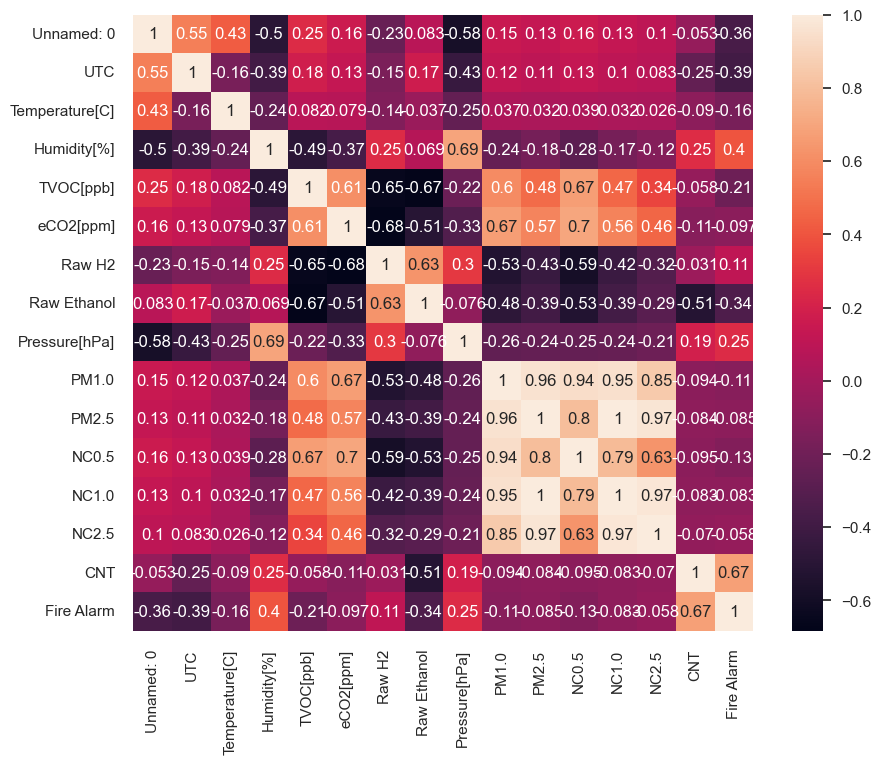

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

<Axes: xlabel='Fire Alarm', ylabel='count'>

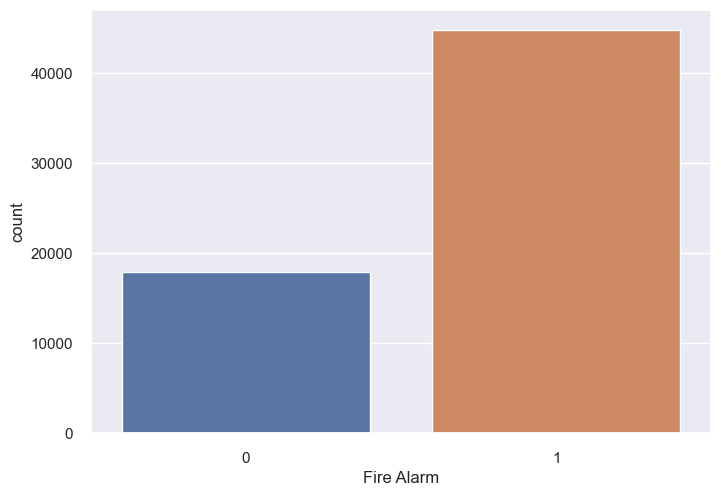

In [41]:


sns.countplot(x ='Fire Alarm', data = datas)

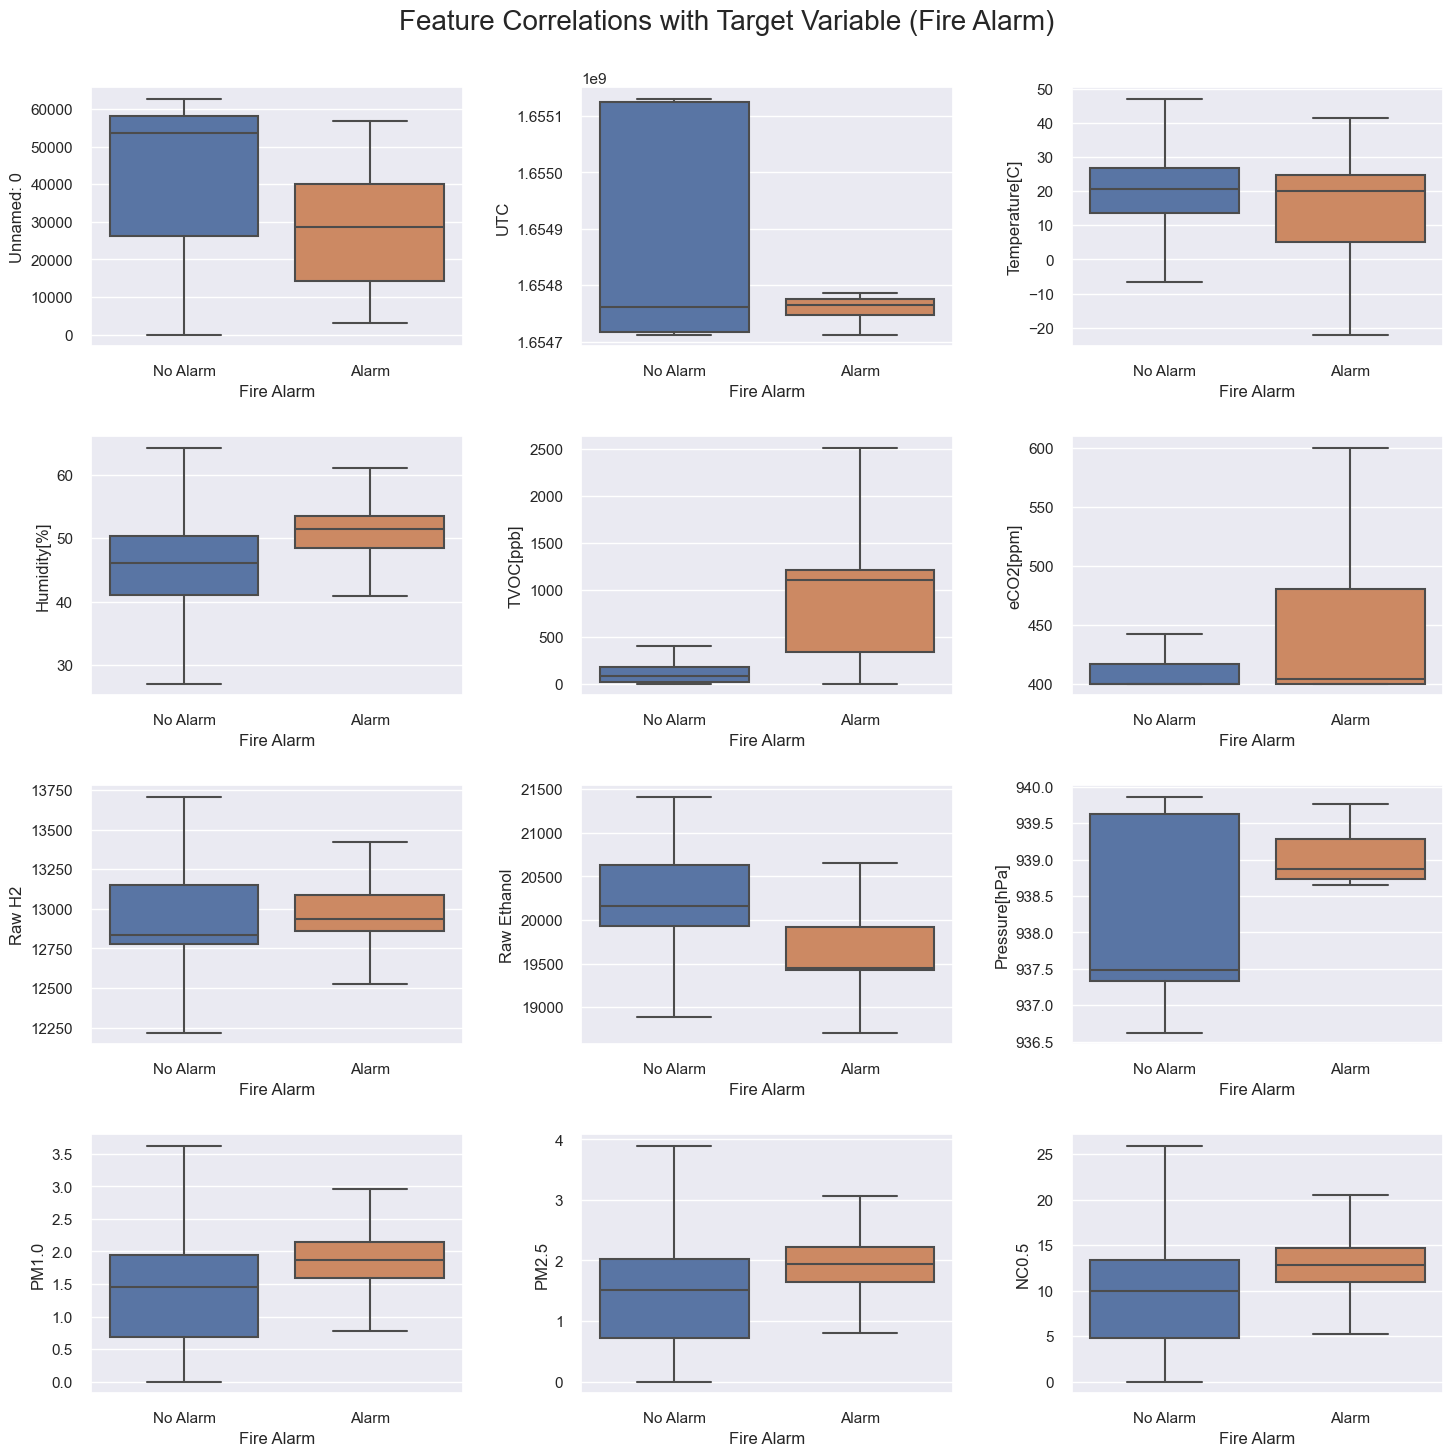

In [42]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 15))

for feature, subplot in zip(datas, ax.flatten()):
    if feature == 'Fire Alarm':
        continue
    sns.boxplot(x = datas['Fire Alarm'], y = datas[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])

plt.suptitle('Feature Correlations with Target Variable (Fire Alarm)', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

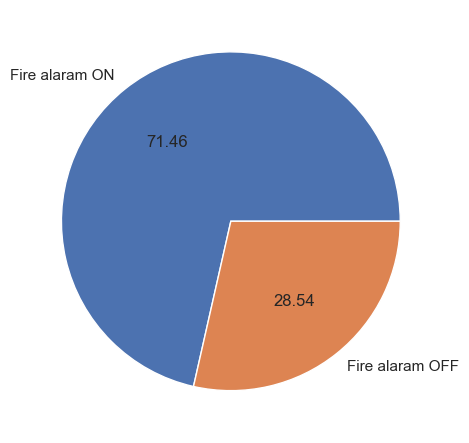

In [43]:
plt.pie(data["Fire Alarm"].value_counts(),labels=['Fire alaram ON','Fire alaram OFF'],autopct="%0.2f")
plt.show()

<Axes: xlabel='Temperature[C]', ylabel='Count'>

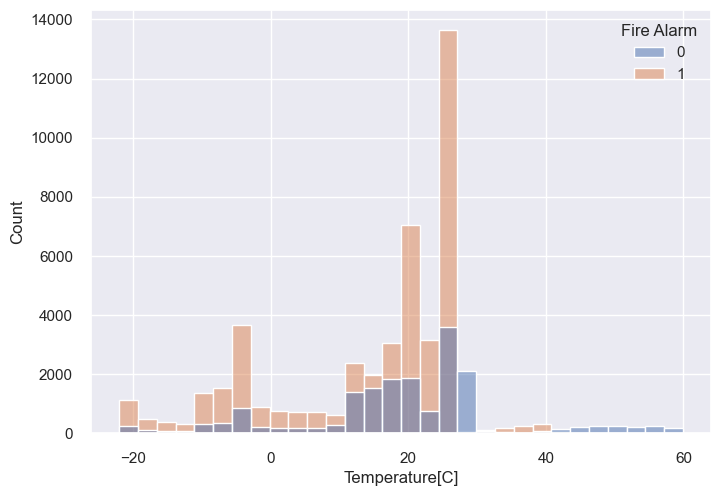

In [44]:
sns.histplot(data=datas,x=datas['Temperature[C]'], bins=30, hue='Fire Alarm')

<Axes: xlabel='Humidity[%]', ylabel='Count'>

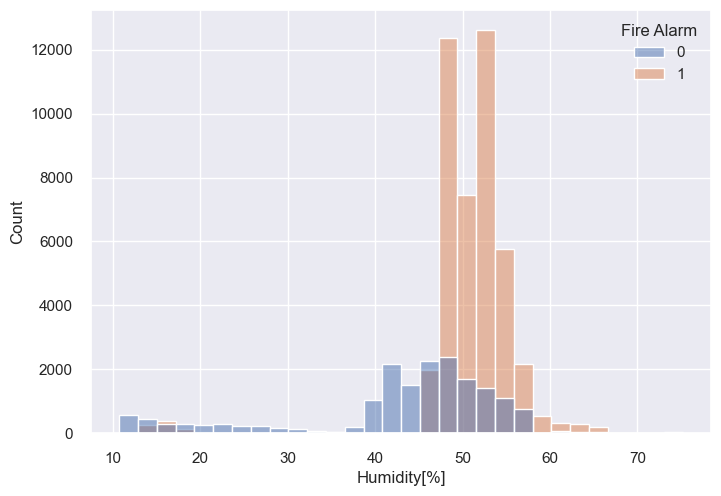

In [45]:
sns.histplot(data=datas,x=datas['Humidity[%]'], bins=30, hue='Fire Alarm')

<Axes: xlabel='Raw Ethanol', ylabel='Count'>

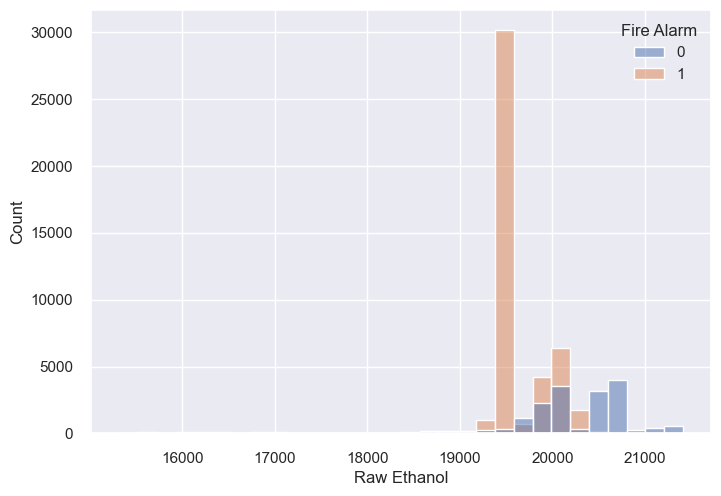

In [46]:
sns.histplot(data=datas,x=datas['Raw Ethanol'], bins=30, hue='Fire Alarm')

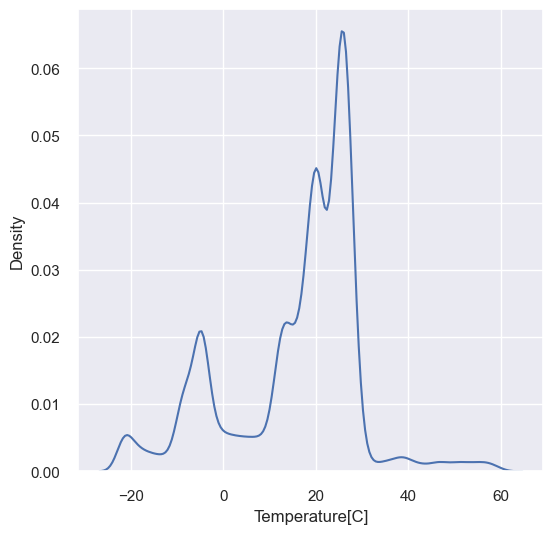

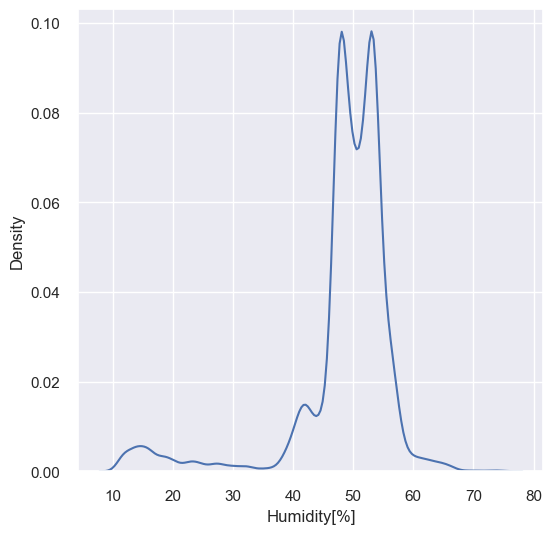

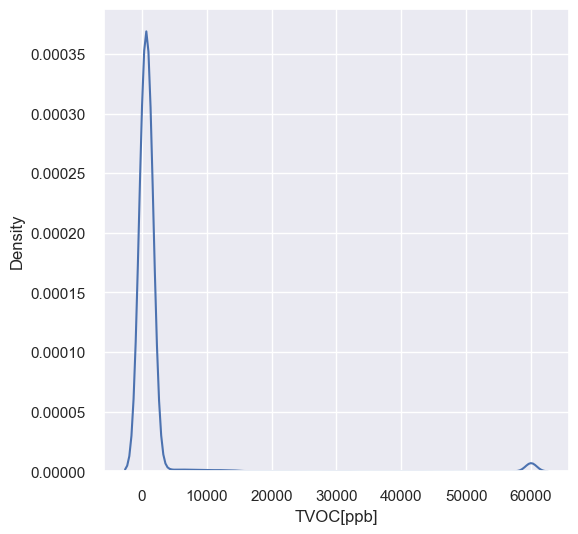

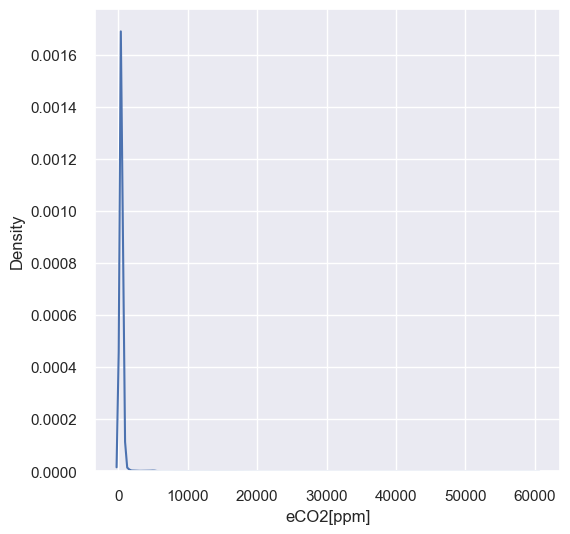

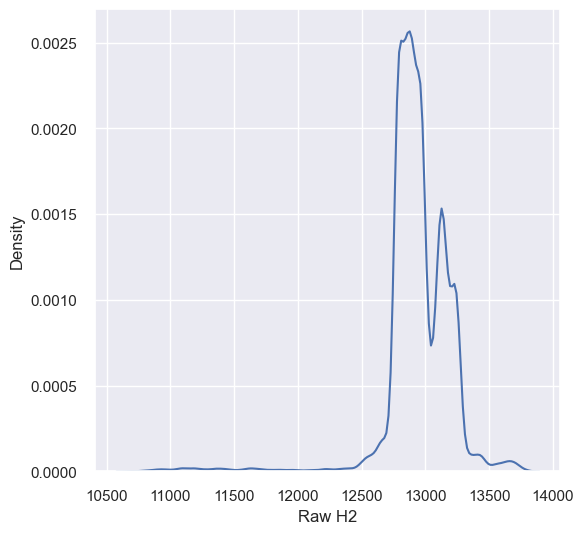

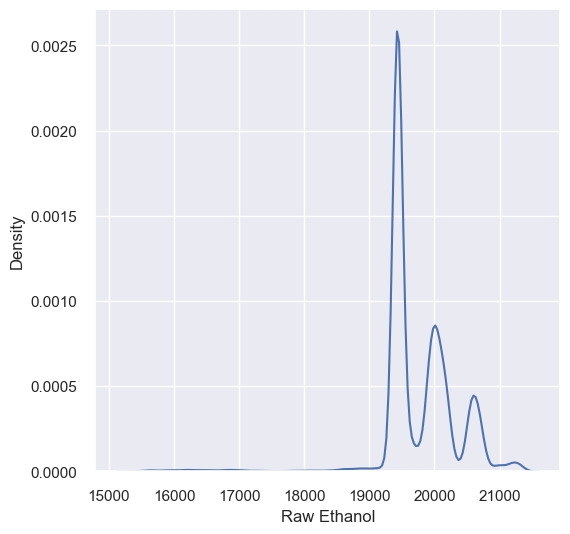

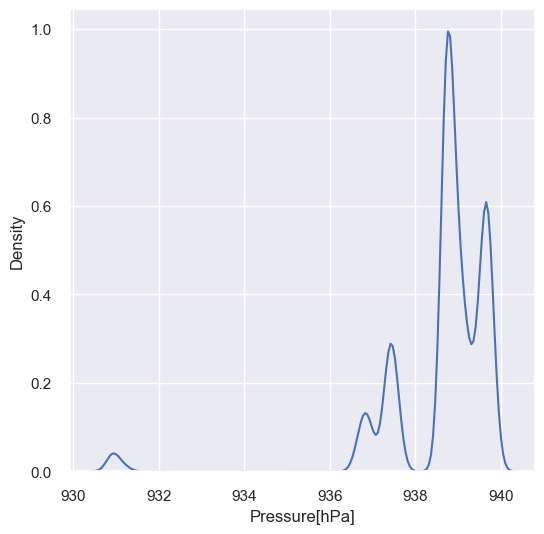

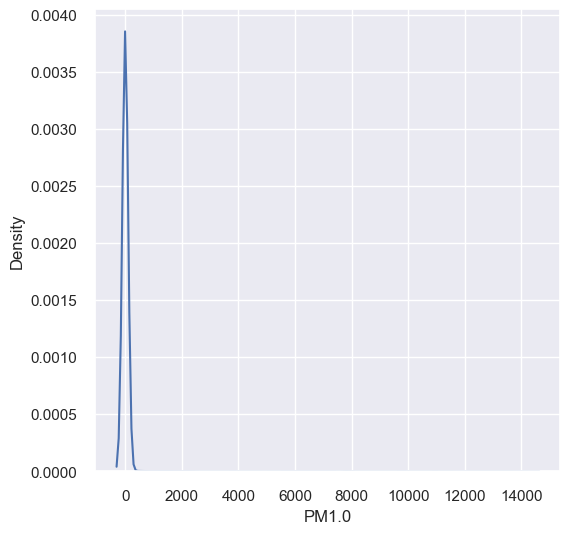

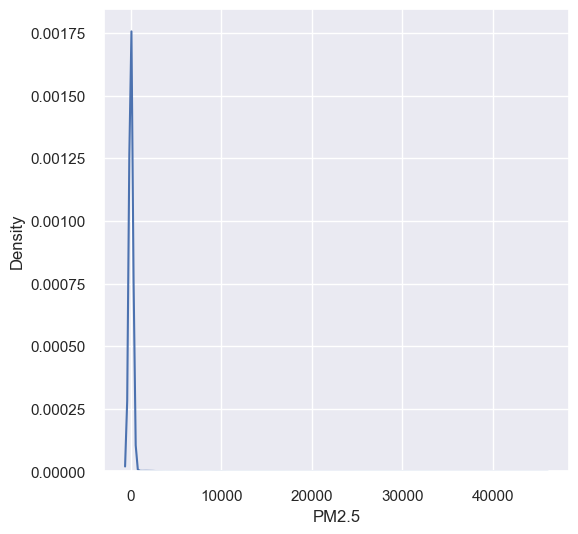

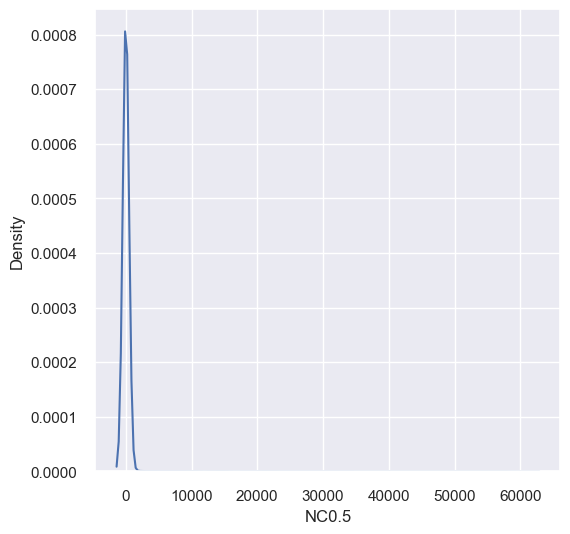

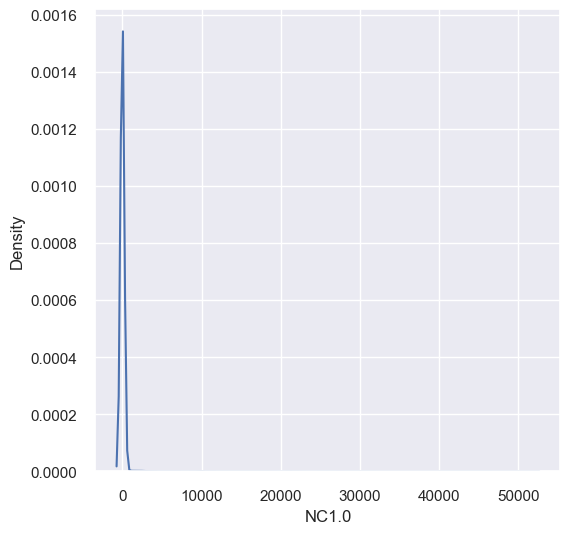

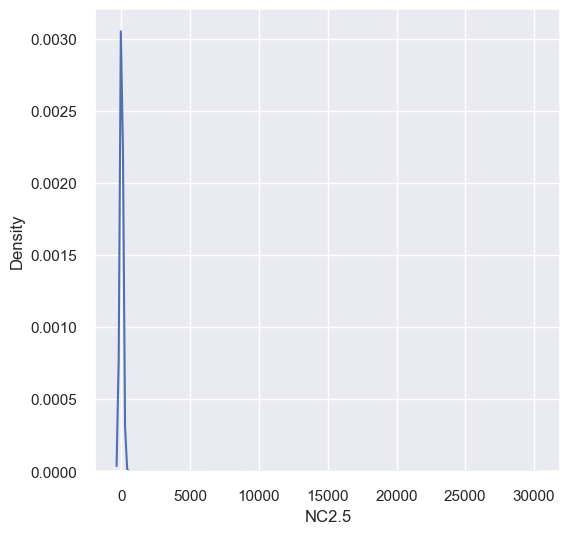

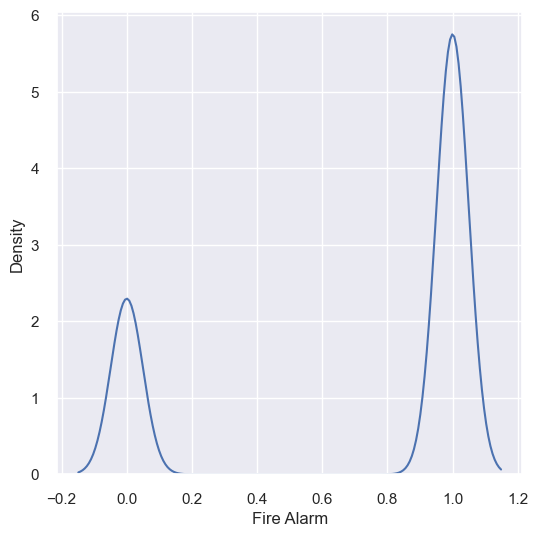

In [47]:
for c in ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'Fire Alarm']:

    plt.figure(figsize = (6,6))
    sns.kdeplot(data = datas,x = c)

    plt.show()

In [48]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

In [49]:


models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

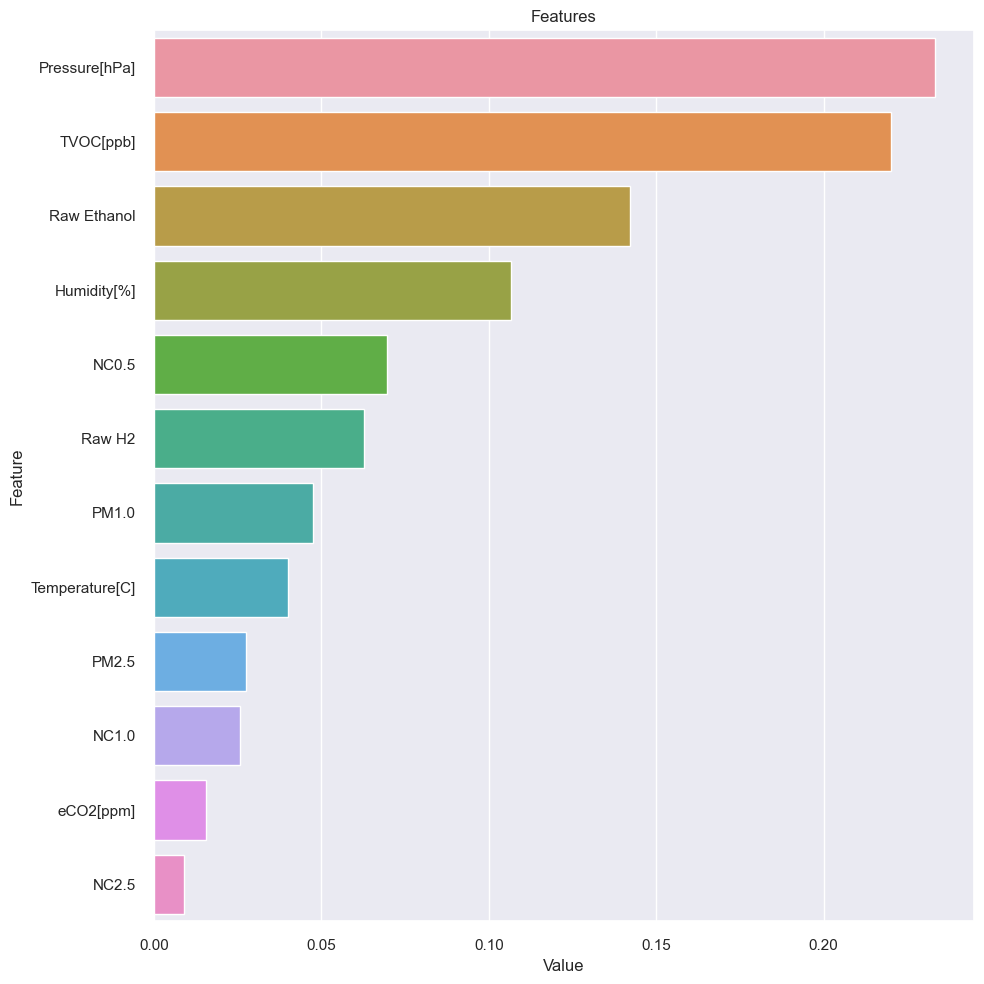

In [50]:
plot_importance(RandomForestClassifier().fit(X_train,y_train), X)